In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [5]:
df = df.rename(
    columns={
        'job_title': 'Job Title',
        'experience_level': 'Experience Level',
        'employment_type': 'Employment Type',
        'work_models': 'Work Models',
        'work_year': 'Work Year',
        'employee_residence': 'Employee Residence',
        'salary': 'Salary',
        'salary_currency': 'Salary Currency',
        'salary_in_usd': 'Salary in USD',
        'company_location': 'Company Location',
        'company_size': 'Company Size'
    }
)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           6599 non-null   object
 1   Experience Level    6599 non-null   object
 2   Employment Type     6599 non-null   object
 3   Work Models         6599 non-null   object
 4   Work Year           6599 non-null   int64 
 5   Employee Residence  6599 non-null   object
 6   Salary              6599 non-null   int64 
 7   Salary Currency     6599 non-null   object
 8   Salary in USD       6599 non-null   int64 
 9   Company Location    6599 non-null   object
 10  Company Size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [7]:
df['Work Year'].value_counts()

Work Year
2023    4625
2022    1112
2024     571
2021     216
2020      75
Name: count, dtype: int64

In [8]:
df['Job Title'].value_counts().head(15)
df['Job Title'] = df['Job Title'].replace({'ML Engineer': 'Machine Learning Engineer'})

Top 5 Job Title's in Data set mean salaries in USD

['0', '25000', '50000', '75000', '100000', '125000', '150000', '175000', '200000']


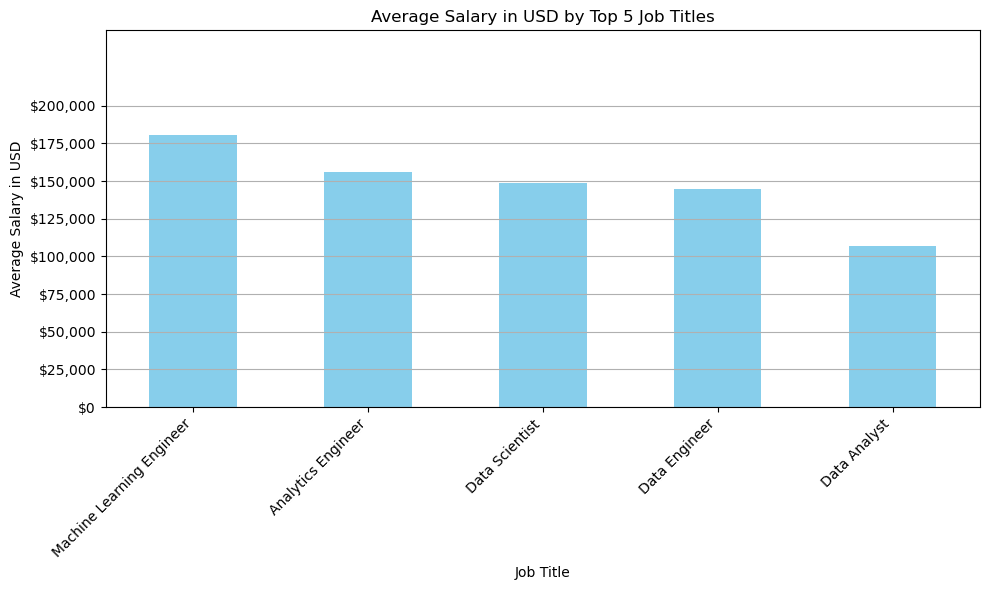

In [9]:
top_5_job_titles = df['Job Title'].value_counts(ascending=False).head(5).index
top_5_df = df[df['Job Title'].isin(top_5_job_titles)]
top_5_average_salaries = top_5_df.groupby('Job Title')['Salary in USD'].mean().sort_values(ascending=False)

fig,ax = plt.subplots()
top_5_average_salaries.plot(kind='bar', color='skyblue',figsize=(10, 6))

ax.set_xticks(ticks=ax.get_xticks(), labels= ax.get_xticklabels(), rotation=45, ha='right')
labels = [item.get_text() for item in ax.get_yticklabels()]
print(labels)
labels = [f'${float(label):,g}' for label in labels]

ax.set_yticks(ticks=ax.get_yticks(),labels=labels)

ax.set_title('Average Salary in USD by Top 5 Job Titles')
ax.set_ylabel('Average Salary in USD')
ax.set_xlabel('Job Title')
ax.set_ylim(0, 250000)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Top 5 Job Titles average salary compared to Experience Level

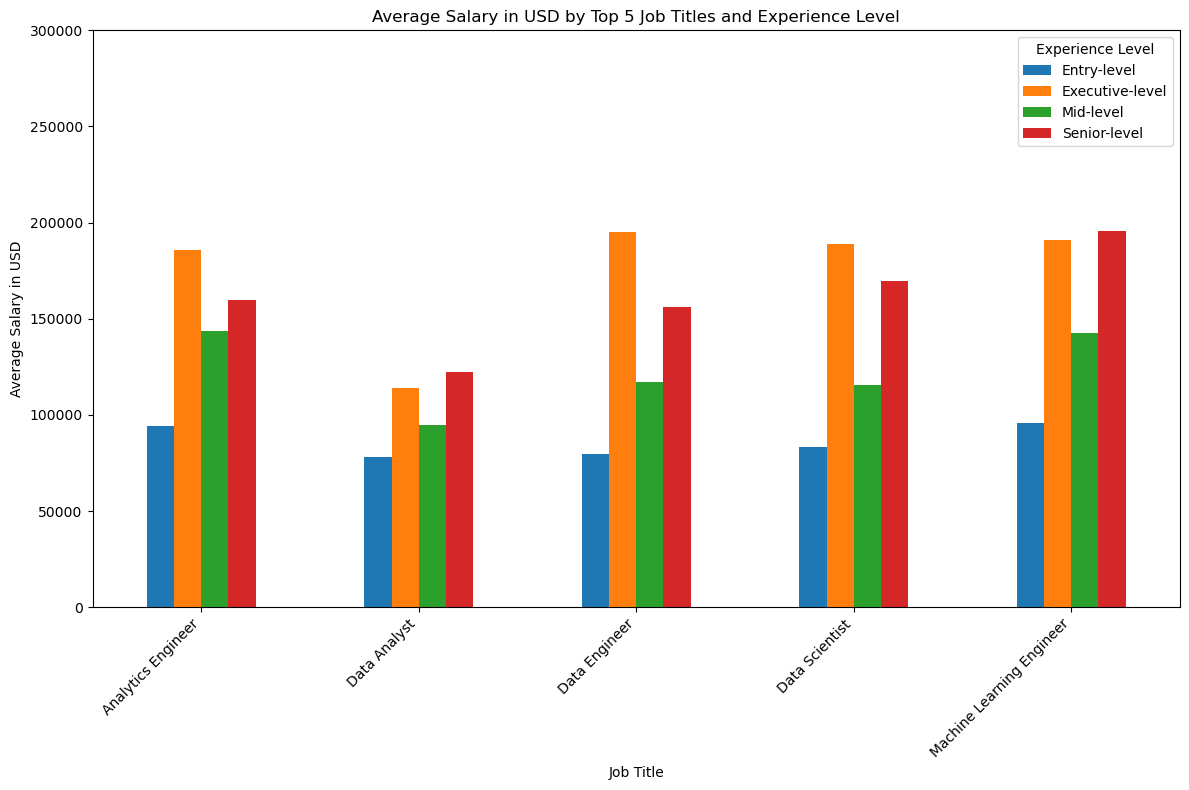

In [10]:
top_5_salaries_experience = top_5_df.groupby(['Job Title', 'Experience Level'])['Salary in USD'].mean().sort_values().unstack()

top_5_salaries_experience.plot(kind='bar', figsize=(12, 8))
plt.title('Average Salary in USD by Top 5 Job Titles and Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.ylim(0, 300000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

In [11]:
df_data = df[df['Job Title'] == 'Machine Learning Engineer']
data_levels = df_data['Experience Level'].value_counts()
data_levels


Experience Level
Senior-level       556
Mid-level          146
Entry-level         34
Executive-level      6
Name: count, dtype: int64

/var/folders/7y/qxnwfnqs3s3733rghjb3s00c0000gn/T/ipykernel_43999/631811000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_df['Experience Level'] = pd.Categorical(top_5_df['Experience Level'], categories=experience_level_order, ordered=True)
/var/folders/7y/qxnwfnqs3s3733rghjb3s00c0000gn/T/ipykernel_43999/631811000.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_salaries_experience_level = top_5_df.groupby(['Experience Level', 'Job Title'])['Salary in USD'].mean().unstack()


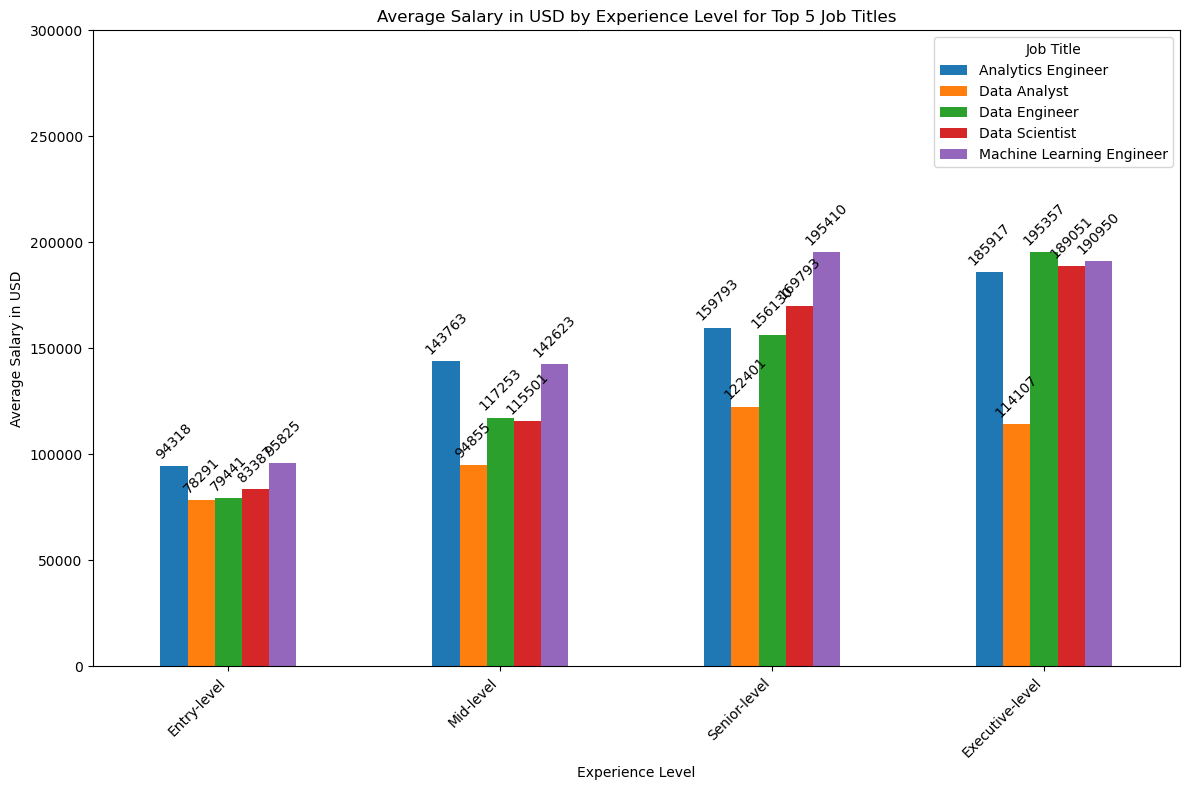

In [12]:
experience_level_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

top_5_df['Experience Level'] = pd.Categorical(top_5_df['Experience Level'], categories=experience_level_order, ordered=True)

average_salaries_experience_level = top_5_df.groupby(['Experience Level', 'Job Title'])['Salary in USD'].mean().unstack()

average_salaries_experience_level = average_salaries_experience_level.loc[experience_level_order]

fig, ax = plt.subplots(figsize=(12, 8))
average_salaries_experience_level.plot(kind='bar', ax=ax)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, rotation=45)

ax.set_title('Average Salary in USD by Experience Level for Top 5 Job Titles')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Average Salary in USD')
ax.set_ylim(0, 300000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

In [13]:
df_job_title = df[['Job Title', 'Salary in USD', 'Work Year']]
df_job_title.sort_values(by='Salary in USD', ascending=False)
df_job_title

,Job Title,Salary in USD,Work Year
0,Data Engineer,148100,2024
1,Data Engineer,98700,2024
2,Data Scientist,140032,2024
3,Data Scientist,100022,2024
4,BI Developer,120000,2024
...,...,...,...
6594,Staff Data Analyst,44753,2020
6595,Staff Data Analyst,15000,2020
6596,Machine Learning Manager,117104,2020
6597,Data Engineer,74130,2020


<Figure size 1200x800 with 0 Axes>

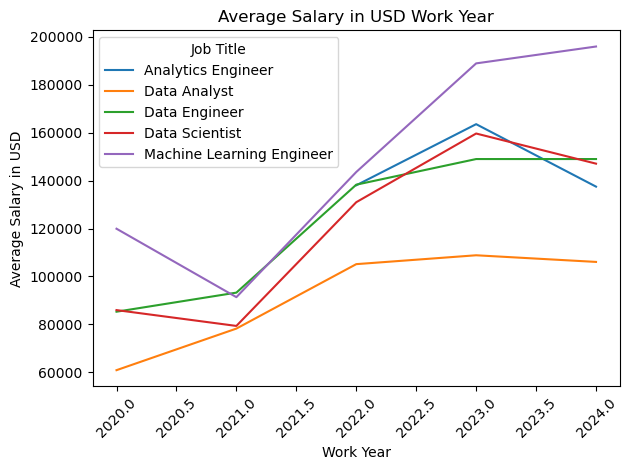

In [14]:
df_job_title_year_mean = top_5_df.groupby(['Work Year', 'Job Title'])['Salary in USD'].mean().unstack()

plt.figure(figsize=(12, 8))
df_job_title_year_mean.plot()

plt.title('Average Salary in USD Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

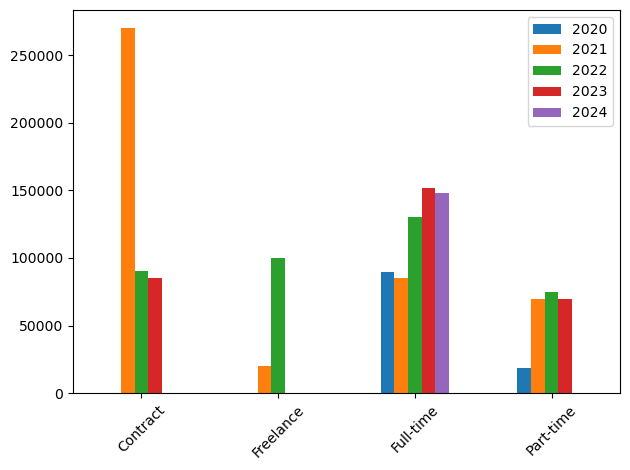

In [15]:
df_work = top_5_df.groupby(['Employment Type', 'Work Year'])['Salary in USD'].mean().unstack()

plt.figure(figsize=(12, 8))
df_work.plot(kind='bar')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='')
plt.tight_layout()
plt.show()

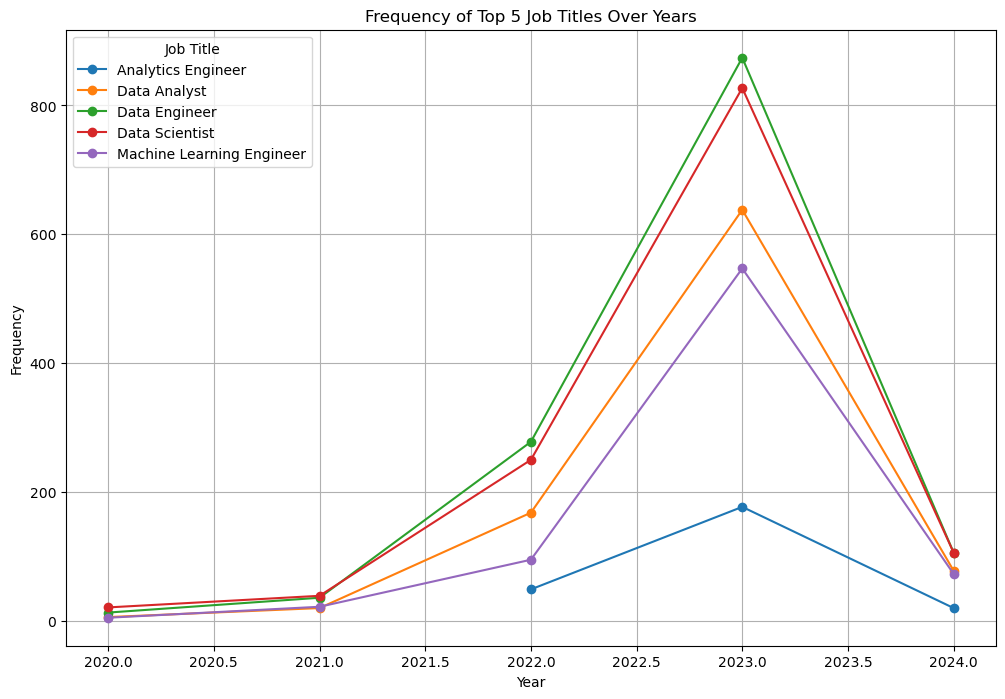

In [16]:
frequency_trends_2023 = top_5_df[top_5_df['Work Year'].isin([2020, 2021, 2022, 2023, 2024])]
frequency_trends = frequency_trends_2023.groupby(['Work Year', 'Job Title']).size().unstack()

plt.figure(figsize=(12, 8))
for job_title in frequency_trends.columns:
    plt.plot(frequency_trends.index, frequency_trends[job_title], marker='o', label=job_title)

plt.title('Frequency of Top 5 Job Titles Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Job Title')
plt.grid(True)
plt.show()

/var/folders/7y/qxnwfnqs3s3733rghjb3s00c0000gn/T/ipykernel_43999/3489991338.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_y_ticks)


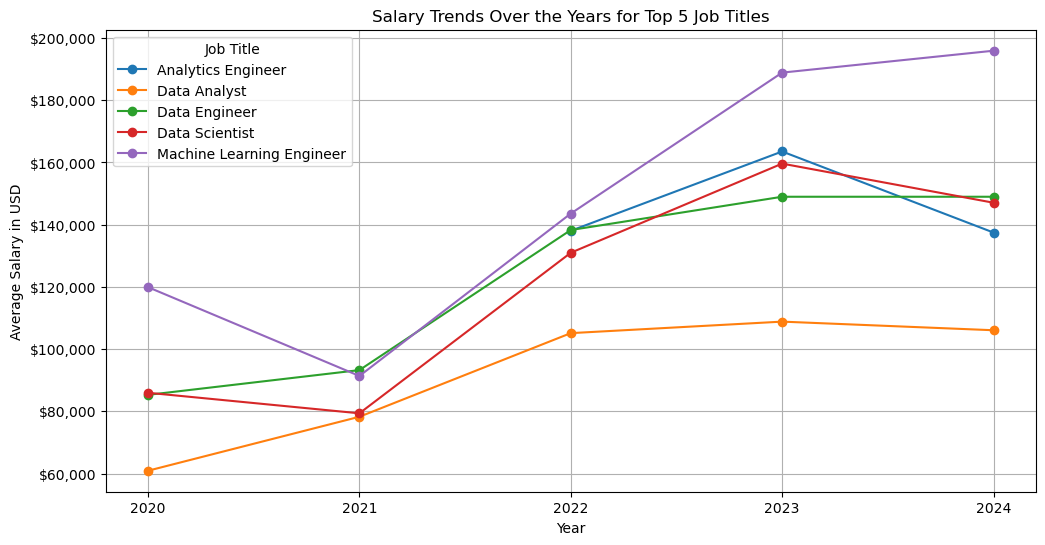

In [19]:
salary_trends_top_5 = top_5_df.groupby(['Work Year', 'Job Title'])['Salary in USD'].mean().unstack()

plt.figure(figsize=(12, 6))
for job_title in salary_trends_top_5.columns:
    plt.plot(salary_trends_top_5.index, salary_trends_top_5[job_title], marker='o', label=job_title)

plt.title('Salary Trends Over the Years for Top 5 Job Titles')
plt.xlabel('Year')

plt.ylabel('Average Salary in USD')
plt.legend(title='Job Title')
plt.grid(True)
ax = plt.gca()

y_ticks = ax.get_yticks()

formatted_y_ticks = [f'${int(tick):,}' for tick in y_ticks]

ax.set_yticklabels(formatted_y_ticks)

years = salary_trends_top_5.index
ax.set_xticks(years)
ax.set_xticklabels(years)

plt.show()